<font size=10>**Transformers for Large Language Models**</font>

<font size=6>**AI-Powered Product Recommendation System**</font>

# **Business Problem**



An emerging e-commerce platform, **ShopEasy**, is facing challenges in providing relevant product recommendations to its customers. It is striving to improve user engagement and boost sales by optimizing its product recommendation system.

The challenge lies in accurately matching user search queries with the most relevant products, ensuring a personalized and seamless shopping experience. Traditional keyword-based search methods often fail to capture the **intent and context** of user queries, leading to irrelevant product listings, poor click-through rates, and lower conversions.

To address this, **ShopEasy** aims to build an **AI-driven product recommendation system** that understands the **semantic meaning** behind user queries and matches them with the most relevant products. Using **state-of-the-art Natural Language Processing (NLP) models like BERT**, the system will enhance search rankings, improve product discoverability, and drive higher sales.

The company’s leadership has identified a dataset of **product descriptions and user queries**, which will be used to train a machine learning model for **semantic similarity-based recommendations**. The objective is to develop an efficient **embedding-based search system** that ranks products based on meaning rather than simple keyword matching.

**ShopEasy** aims to address this by leveraging **AI-driven semantic search and recommendation models** to enhance product discovery and search relevance.

## **Key Business Outcomes**
✅ **Improved Product Ranking:** Products are re-ranked based on semantic similarity, leading to higher visibility of relevant items.

✅ **Higher Conversion Rates:** Better recommendations lead to an increase in click-through rates and sales conversions.

✅ **Enhanced Customer Experience:** Users find what they are looking for faster, leading to higher retention and satisfaction.

✅ **Scalability & Efficiency:** The use of precomputed embeddings enables fast, real-time recommendations without high computational costs.

## **Objective**
The goal is to develop an **AI-powered recommendation engine** that:

🔹 Understands **semantic relationships** between user queries and product descriptions.

🔹 Accurately ranks products based on **meaning and relevance**, rather than simple keyword matching.

🔹 Enhances **product discoverability** and optimizes search results for better conversions.

🔹  Improve **customer experience** through **intelligent ranking and retrieval** of products.

🔹 Enables efficient **real-time recommendations** using **sentence embeddings and cosine similarity**.

## <font color='blue'>**Solution Approach**</font>

<font color='blue'>**1. Data Input & Preprocessing**</font>
* The dataset includes **product descriptions**, product name, brand, product specifications, product category tree.
* Preprocess data by handling **missing values**, **text normalization**, and **filtering irrelevant content**.

<font color='blue'>**2. Semantic Understanding with BERT-Based Embeddings**</font>
* Utilize **BERT Tokenization** to generate **contextual embeddings** for product descriptions.
* Convert **user queries** into vector representations using **pre-trained BERT and Sentence Transformers** (`all-mpnet-base-v2`).
* Store embeddings efficiently to **avoid recomputing** them repeatedly.

<font color='blue'>**3. Cosine Similarity-Based Recommendations**</font>
* Compute **cosine similarity** between user query embeddings and product embeddings.
* Rank products in descending order based on **semantic relevance**.
*Display **top-N recommendations** to users in real-time.

## <font color='blue'>**Solution Workflow**</font>

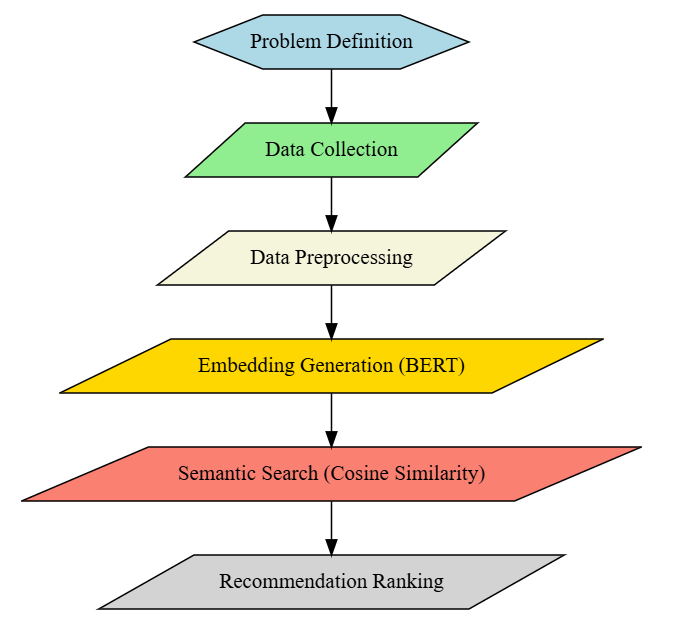

## <font color='blue'>**How to Proceed**</font>



**How to Proceed**

1. Dataset Loading and Pre-processing
2. Embedding-Based Retrieval (BERT for Vector Representation)
3. Semantic Similarity Search (Cosine Similarity for Matching)
4. Sentence Transformer
5. Evaluation and Visualization

# **<font color='blue'>Dataset Loading and Pre-processing</font>**

We will be using the following Libraries

1. **NumPy** (`np`) and **Pandas** (`pd`): Used for numerical computations and handling tabular data.

3. **tqdm**: Enables progress bars when using Pandas operations.

3. **`cosine_similarity`** from **`sklearn.metrics.pairwise`**: Used for computing similarity between vectors.

4. **`warnings.filterwarnings('ignore')`**: Suppresses warning messages to keep the output clean.



In [107]:
import numpy as np
import pandas as pd

from tqdm import tqdm
tqdm.pandas()

from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

Read the provided e-commerce dataset.

In [108]:
data = pd.read_csv('content/Shopeasy_product_dataset.csv', low_memory = True)
# low_memory=True in pd.read_csv() allows Pandas to read large CSV files in chunks, reducing memory usage and preventing dtype-related warnings.


data.head(5)

,product_name,product_category_tree,description,brand,product_specifications
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [109]:
data.shape

(20000, 5)

1. `data.drop_duplicates(inplace=True)`
- This removes duplicate rows from the DataFrame `data`.
- The parameter `inplace=True` ensures that the operation is performed directly on `data` without needing to assign it back.
2. `data.shape`
- This returns the shape of the DataFrame as a tuple `(rows, columns)`, allowing you to check the number of rows and columns after duplicates have been removed.

In [110]:
data.drop_duplicates(inplace=True)
data.shape

(19614, 5)

Compute the count of missing values in each column to identify data cleaning requirements.



In [111]:
data.isna().sum()

product_name                 0
product_category_tree        0
description                  2
brand                     5744
product_specifications      14
dtype: int64

Replace all missing values with an empty string to avoid issues during text processing.



In [112]:
data.replace(np.nan, '', inplace=True)
data.isna().sum()

product_name              0
product_category_tree     0
description               0
brand                     0
product_specifications    0
dtype: int64

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19614 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_name            19614 non-null  object
 1   product_category_tree   19614 non-null  object
 2   description             19614 non-null  object
 3   brand                   19614 non-null  object
 4   product_specifications  19614 non-null  object
dtypes: object(5)
memory usage: 919.4+ KB


In [114]:
data = data.astype(str)
data = data.applymap(lambda x: x.lower())

* The dataset likely contains text data with special characters, punctuation, and unnecessary symbols.
* This step removes all non-alphanumeric characters using `re.sub('[^A-Za-z0-9]+', ' ', str(x))`.
* The function is applied to every cell in the dataframe using `applymap()`, ensuring that all text-based entries are cleaned.

In [75]:
# Data cleaning, removing any non alphanumeric characters
import re
data = data.applymap(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x)))
data.head(3)

,product_name,product_category_tree,description,brand,product_specifications
0,alisha solid women s cycling shorts,clothing women s clothing lingerie sleep swim...,key features of alisha solid women s cycling s...,alisha,product specification key number of contents ...
1,fabhomedecor fabric double sofa bed,furniture living room furniture sofa beds fut...,fabhomedecor fabric double sofa bed finish col...,fabhomedecor,product specification key installation demo d...
2,aw bellies,footwear women s footwear ballerinas aw bellies,key features of aw bellies sandals wedges heel...,aw,product specification key ideal for value wom...


This creates a new column `combined_text` by concatenating multiple textual columns:
- product_name
- product_category_tree
- description
- brand
- product_specifications

Each value is joined with a space (`' '`) to maintain readability.
This is useful for NLP tasks like product recommendation, search ranking, or semantic analysis.
python
Copy
Edit


In [76]:
data['combined_text'] = data['product_name'] + ' ' +  data['product_category_tree'] + ' ' +  data['description'] + ' ' +  data['brand'] + ' ' +  data['product_specifications']
data['combined_text'].astype(str)
data.head(3)

,product_name,product_category_tree,description,brand,product_specifications,combined_text
0,alisha solid women s cycling shorts,clothing women s clothing lingerie sleep swim...,key features of alisha solid women s cycling s...,alisha,product specification key number of contents ...,alisha solid women s cycling shorts clothing ...
1,fabhomedecor fabric double sofa bed,furniture living room furniture sofa beds fut...,fabhomedecor fabric double sofa bed finish col...,fabhomedecor,product specification key installation demo d...,fabhomedecor fabric double sofa bed furniture...
2,aw bellies,footwear women s footwear ballerinas aw bellies,key features of aw bellies sandals wedges heel...,aw,product specification key ideal for value wom...,aw bellies footwear women s footwear ballerin...


In [77]:
data.shape

(19614, 6)

# **<font color='blue'>Embedding-Based Retrieval</font>**

Load the **BERT tokenizer** from the **Hugging Face Transformers** library.
- We use the **"bert-base-uncased"** version, which is a l**owercased version of BERT** (i.e., text is converted to lowercase before tokenization).
- The tokenizer **splits text into subword tokens** and **converts words into numerical token IDs**.

Look for the in-line comments ## ?? Your solution here and enter the correct code to load a BERT tokenizer

In [78]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')  # Loads the pre-trained BERT-base model

# This model can be used for various NLP tasks, such as text classification, named entity recognition (NER), and sentence embeddings.

# Ensure the model is moved to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


#### **Understanding the `bert_tokenization` function**

* The function `bert_tokenization` takes a text input (likely product descriptions) and tokenizes it using a BERT tokenizer.

* Adding Special Tokens ([CLS] and [SEP])
  * `[CLS]` (Classification Token):
    - This is added at the start of every input sequence.
    - It serves as a summary representation of the entire sequence and is often used for classification tasks.
  * `[SEP]` (Separator Token):
    - This is added at the end of each sequence.
    - It helps BERT differentiate between different sentences (especially in tasks like question answering).
  * Example of tokenized text:

      📌 Original Sentence:

      `"Nike running shoes are very comfortable."`

      📌 After BERT Tokenization:

      `["[CLS]", "Nike", "running", "shoes", "are", "very", "comfortable", "[SEP]"]`

  * Since BERT has a maximum sequence length of 512 tokens, the function splits the input text into chunks of **510 tokens** (to leave room for `[CLS]` and `[SEP]`).
* Each chunk is converted into numerical token IDs (as BERT only understands numbers) and moved to the GPU.
  * The function extracts **`[CLS]` token embeddings** for each chunk.
* The embeddings of all chunks are averaged to obtain a final sentence-level embedding.

##### 🔍 <font color='magenta'>**Activity: Understanding a Complex Function**</font>

The code below is a long function. To grasp its functionality, use AI to break it down step by step.  

###### 👉 How to proceed:  


Explain step by step how the following code works:

## 🔍 Function: `bert_tokenization(text)`

This function converts a long text into a fixed-size embedding vector using a BERT model, handling inputs that exceed the 512-token limit by chunking and averaging.

---

### 🔧 Step-by-Step Breakdown

1. **Tokenize the Text**  
   The input `text` is first tokenized using the `tokenizer.tokenize()` method, which breaks it down into subword tokens that BERT understands.

2. **Add Special Tokens**  
   The `[CLS]` token is added at the beginning and `[SEP]` at the end — required for BERT to mark the boundaries of the input.

3. **Prepare for Chunking**  
   BERT has a maximum input length of 512 tokens. We subtract 2 to account for `[CLS]` and `[SEP]`, so we create chunks of up to 510 tokens.

4. **Chunk the Tokens**  
   The tokenized text is split into chunks of up to 510 tokens, then we prepend `[CLS]` and append `[SEP]` to each chunk, ensuring it's a valid BERT input.

5. **Convert to Input IDs**  
   Tokens are converted into numerical input IDs using `tokenizer.convert_tokens_to_ids()`. The result is converted into a PyTorch tensor and moved to the GPU (`device`).

6. **Generate Embeddings**  
   With gradients disabled (`torch.no_grad()`), we feed the input IDs into the `model` to get the output tensor. The embedding for the `[CLS]` token (first position) is extracted — it typically serves as the "summary" representation of the chunk.

7. **Store Embeddings**  
   Each `[CLS]` embedding is moved to CPU and converted to a NumPy array before being stored in `chunk_embeddings`.

8. **Aggregate Final Embedding**  
   Once all chunks are processed, we take the **mean of all `[CLS]` embeddings** to get a single vector that represents the full input text.

9. **Return the Embedding**  
   The resulting vector is returned as the final representation of the text.

---

### ✅ Returns

A NumPy array containing the averaged embedding vector (typically 768-dimensional for BERT-base).

---

In [79]:
def bert_tokenization(text):
    # Tokenize the sentences
    tokens = tokenizer.tokenize(text)

    # Add [CLS] and [SEP] tokens
    tokens = ['[CLS]'] + tokens + ['[SEP]']

    # Initialize an empty list to store chunk embeddings
    chunk_embeddings = []

    # Split the tokenized text into chunks of 512 tokens each (accounting for [CLS] and [SEP] tokens)
    max_length = 512 - 2  # 512 total tokens minus [CLS] and [SEP]

    # Split into chunks of 510 tokens + [CLS] and [SEP] tokens
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i + max_length]

        # Add [CLS] and [SEP] tokens to each chunk
        chunk = ['[CLS]'] + chunk + ['[SEP]']

        # Convert tokens to input IDs
        input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(chunk)).unsqueeze(0).to(device)  # Move input_ids to GPU

        # Get the embeddings for the chunk
        with torch.no_grad():
            outputs = model(input_ids)  # This will be on the same device as input_ids (GPU)
            chunk_embedding = outputs.last_hidden_state[:, 0, :]  # [CLS] token embedding
            chunk_embeddings.append(chunk_embedding.squeeze().cpu().numpy())  # Move the embedding back to CPU and convert to numpy

    # Combine the embeddings of the chunks (e.g., averaging them)
    combined_embedding = np.mean(chunk_embeddings, axis=0)

    return combined_embedding

- Use `tqdm.pandas()`: This enables progress tracking for .apply() operations.
- Apply `bert_tokenization`: The `bert_tokenization` function (analyzed earlier) generates BERT embeddings for the `combined_text` column.
- Store embeddings in a new column `"Embeddings"`.

In [80]:
from tqdm import tqdm
tqdm.pandas()

# BERT Embeddings for the product
data["Embeddings"] = data['combined_text'].progress_apply(bert_tokenization)
data.head(3)

100%|██████████| 19614/19614 [24:55<00:00, 13.11it/s]


,product_name,product_category_tree,description,brand,product_specifications,combined_text,Embeddings
0,alisha solid women s cycling shorts,clothing women s clothing lingerie sleep swim...,key features of alisha solid women s cycling s...,alisha,product specification key number of contents ...,alisha solid women s cycling shorts clothing ...,"[-0.45641235, -0.2963447, -0.050141577, -0.102..."
1,fabhomedecor fabric double sofa bed,furniture living room furniture sofa beds fut...,fabhomedecor fabric double sofa bed finish col...,fabhomedecor,product specification key installation demo d...,fabhomedecor fabric double sofa bed furniture...,"[-0.5983548, 0.010219112, 0.35398918, 0.130209..."
2,aw bellies,footwear women s footwear ballerinas aw bellies,key features of aw bellies sandals wedges heel...,aw,product specification key ideal for value wom...,aw bellies footwear women s footwear ballerin...,"[-0.31796047, 0.028232012, -0.056039143, -0.14..."


In [81]:
data.head()

,product_name,product_category_tree,description,brand,product_specifications,combined_text,Embeddings
0,alisha solid women s cycling shorts,clothing women s clothing lingerie sleep swim...,key features of alisha solid women s cycling s...,alisha,product specification key number of contents ...,alisha solid women s cycling shorts clothing ...,"[-0.45641235, -0.2963447, -0.050141577, -0.102..."
1,fabhomedecor fabric double sofa bed,furniture living room furniture sofa beds fut...,fabhomedecor fabric double sofa bed finish col...,fabhomedecor,product specification key installation demo d...,fabhomedecor fabric double sofa bed furniture...,"[-0.5983548, 0.010219112, 0.35398918, 0.130209..."
2,aw bellies,footwear women s footwear ballerinas aw bellies,key features of aw bellies sandals wedges heel...,aw,product specification key ideal for value wom...,aw bellies footwear women s footwear ballerin...,"[-0.31796047, 0.028232012, -0.056039143, -0.14..."
3,alisha solid women s cycling shorts,clothing women s clothing lingerie sleep swim...,key features of alisha solid women s cycling s...,alisha,product specification key number of contents ...,alisha solid women s cycling shorts clothing ...,"[-0.5304306, -0.32681286, -0.044856247, -0.190..."
4,sicons all purpose arnica dog shampoo,pet supplies grooming skin coat care shampoo ...,specifications of sicons all purpose arnica do...,sicons,product specification key pet type value dog ...,sicons all purpose arnica dog shampoo pet sup...,"[-0.89961493, 0.09740739, 0.04649891, -0.15025..."


# **<font color='blue'>Semantic Similarity Search</font>**

📌 What’s happening?

- We define a text input: `"T-shirt"`.
- The function `bert_tokenization(text)` is called to **convert the text into a BERT embedding**.
- The output `embeds` is the **vector representation** (dense numerical array) of the text "T-shirt".

Instead of comparing raw text, embeddings **capture the meaning** and can be used for similarity comparisons.

In [82]:
text = "T-shirt"
embeds = bert_tokenization(text)
embeds

array([-2.19588444e-01, -1.69805706e-01, -1.04595172e+00,  9.42522809e-02,
        1.52354509e-01, -9.70711783e-02, -2.58825839e-01,  5.81548989e-01,
       -2.19711229e-01,  1.32780761e-01,  2.09146589e-02, -3.75279009e-01,
       -5.25565088e-01,  9.07235220e-03, -2.04551816e-01,  4.40853164e-02,
       -3.77426863e-01,  7.69320309e-01,  3.22693676e-01,  3.24187309e-01,
        2.75886595e-01, -1.44156143e-01, -6.76250994e-01,  1.93285346e-01,
       -2.52499193e-01, -3.56958658e-02, -1.54647797e-01, -6.01539731e-01,
        2.37718970e-01,  9.01294723e-02, -1.20872214e-01,  9.45620686e-02,
        2.90213674e-01, -4.43097442e-01,  4.27824050e-01, -5.26725054e-01,
        6.19770348e-01, -2.35880852e-01,  1.16083264e-01, -5.99680990e-02,
        1.71808898e-02,  1.19940639e-01,  6.38720989e-01, -3.43911827e-01,
        5.30363023e-02, -4.93224800e-01, -1.77159500e+00,  4.30246681e-01,
       -1.00523591e+00, -2.13694185e-01,  3.05105746e-01, -4.62630451e-01,
        1.11167602e-01,  

- Retrieve the first embedding from `data['Embeddings']`.
- `data['Embeddings'][0]` accesses the **first stored embedding**.
- We print temp to check its contents.

In [83]:
temp = data['Embeddings'][0]  # Get the actual array/tensor
print(temp)

[-4.56412345e-01 -2.96344697e-01 -5.01415767e-02 -1.02795027e-01
 -6.99763715e-01  2.82497764e-01  2.06633359e-01  3.45606089e-01
 -5.68750203e-01  3.91411185e-02  1.43881440e-01 -4.30944055e-01
  1.67279437e-01  2.71342874e-01 -2.60119498e-01 -3.34306479e-01
  2.04418346e-01  1.03624249e+00  2.49596864e-01  3.37999076e-01
 -1.35496318e-01 -7.97742546e-01  5.57461858e-01 -3.31692308e-01
  1.87160403e-01 -6.45193532e-02  6.59843162e-03  7.56979659e-02
  1.13607936e-01 -2.17511147e-01  2.95744777e-01  5.15993893e-01
 -3.75684530e-01 -5.06606400e-01  8.64167809e-01 -5.27544498e-01
  4.97966915e-01 -2.94081390e-01  5.87543428e-01  2.05541953e-01
 -5.94926834e-01  1.90217465e-01  6.21347308e-01  1.93318427e-01
  2.65388072e-01 -1.86565757e-01 -3.01764035e+00  3.96002829e-01
 -3.30796957e-01 -7.53217280e-01  5.36431253e-01 -9.18662846e-01
  4.68212068e-01  6.62436128e-01  3.92025948e-01  1.20422256e+00
 -1.50775954e-01 -1.22646093e-02  5.60747087e-01  2.14129016e-01
  3.96282047e-01 -2.14473

In [84]:
print(data['Embeddings'].keys())        # Print all available keys

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       19984, 19987, 19990, 19991, 19993, 19994, 19996, 19997, 19998, 19999],
      dtype='int64', length=19614)


- We check if the key 19614 exists in `data['Embeddings']`.
- This prevents errors when trying to access missing embeddings.

In [85]:
print(19614 in data['Embeddings'])  # Should return True or False
print(data['Embeddings'].keys())  # Check available keys


True
Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       19984, 19987, 19990, 19991, 19993, 19994, 19996, 19997, 19998, 19999],
      dtype='int64', length=19614)


Compute the **cosine similarity** between `"T-shirt"`'s embedding and a product at index `19614`.

🔹 **Cosine similarity measures** how similar two vectors are, with:

- <font color='blue'>**1.0 </font>→ Exactly the same**
- <font color='blue'>**0.0 </font>→ Completely different**
- <font color='blue'>**Negative values </font>→ Opposite meaning**

In [86]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity between "T-shirt" and item at index 19614
if 19614 in data['Embeddings']:
    target_embedding = data['Embeddings'][19614]
    similarity = cosine_similarity(
        np.array(embeds).reshape(1, -1),
        np.array(target_embedding).reshape(1, -1)
    )[0][0]
    print(f"Cosine similarity with item 19614: {similarity:.4f}")
else:
    print("Embedding for index 19614 not found.")

Cosine similarity with item 19614: 0.7325


#### <font color='blue'>**Finding Similar Products Using Cosine Similarity**</font>

- Generate embeddings for `"Fastrack Watches for men"`.
- Iterate through `data['Embeddings']` and calculates cosine similarity with the query.
- Store similarity scores in a new column `"SS"`.

In [87]:
text = "Fastrack Watches for men"
embeds = bert_tokenization(text)
data['similarity_score'] = 0
for idx, val in enumerate(data['Embeddings']):
  data['similarity_score'][idx] = cosine_similarity([embeds], [val])

# Sorts the dataset based on similarity (SS) in descending order.
# Displays the top 10 recommended products.

recommendations = data.sort_values(by='similarity_score', ascending=False)
recommendations.head(10)


,product_name,product_category_tree,description,brand,product_specifications,combined_text,Embeddings,similarity_score
11199,getabhi solid tie,clothing men s clothing accessories combo set...,getabhi solid tie buy maroon getabhi solid tie...,,product specification key pattern value solid...,getabhi solid tie clothing men s clothing acc...,"[-0.3846252, -0.4040623, 0.19899684, 0.0758005...",0.889142
15481,pxl men s solid formal shirt,clothing men s clothing shirts formal shirts ...,pxl men s solid formal shirt buy dark blue blu...,slim,product specification key pattern value solid...,pxl men s solid formal shirt clothing men s c...,"[-0.57254696, -0.27841985, 0.53619313, 0.05830...",0.880467
6974,belkin play max router,computers network components routers belkin r...,buy belkin play max router only for rs 8199 fr...,belkin,product specification key firewall value nat ...,belkin play max router computers network comp...,"[-0.5292227, 0.15027386, 0.22550687, -0.000953...",0.877186
15493,reckler slim fit men s jeans,clothing men s clothing jeans reckler jeans,reckler slim fit men s jeans buy pure black li...,slim,product specification key number of contents ...,reckler slim fit men s jeans clothing men s c...,"[-0.13897929, -0.3095748, 0.3681946, -0.027143...",0.873541
15518,ceylin full sleeve printed women s sweatshirt,clothing women s clothing winter seasonal wea...,ceylin full sleeve printed women s sweatshirt ...,,product specification key hooded value no key...,ceylin full sleeve printed women s sweatshirt ...,"[-0.12980773, -0.3668662, 0.22655798, 0.010444...",0.873203
18559,hubberholme solid men s red track pants,clothing men s clothing inner wear sleep wear...,key features of hubberholme solid men s red tr...,hubberholme,product specification key number of contents ...,hubberholme solid men s red track pants cloth...,"[-0.40480775, -0.013524962, 0.19867827, -0.226...",0.872082
15779,zoot24 don loafers,footwear men s footwear casual shoes zoot24 c...,zoot24 don loafers buy zoot24 don loafers don ...,,product specification key ideal for value men...,zoot24 don loafers footwear men s footwear ca...,"[-0.13701639, -0.20200357, 0.20220773, -0.0084...",0.871107
15389,campus berlin running shoes,footwear women s footwear sports shoes running,campus berlin running shoes buy campus berlin ...,,product specification key occasion value spor...,campus berlin running shoes footwear women s ...,"[-0.41285995, -0.19287676, 0.25523782, -0.0048...",0.870501
7648,g fashion printed cotton women s harem pants,clothing women s clothing ethnic wear ethnic ...,key features of g fashion printed cotton women...,g fashion,product specification value 1 harem pant key ...,g fashion printed cotton women s harem pants ...,"[-0.4480303, -0.40550274, 0.32213962, 0.130018...",0.869543
15376,magnifico glass pendant,jewellery pendants lockets,magnifico glass pendant buy magnifico glass pe...,magnifico,product specification key body material value...,magnifico glass pendant jewellery pendants lo...,"[-0.49561727, 0.11610209, 0.101158336, -0.0133...",0.868075


In [88]:
for i in recommendations.product_name.head(10):
  print(i)

getabhi solid tie
pxl men s solid formal shirt
belkin play max router
reckler slim fit men s jeans
ceylin full sleeve printed women s sweatshirt
hubberholme solid men s red track pants
zoot24 don loafers
campus berlin running shoes
g fashion printed cotton women s harem pants
magnifico glass pendant


The recommendations generated for the query "Fastrack watch for men" appear to be inaccurate, as they include unrelated items like shirts, jeans, and shoes instead of watches.

This suggests that the **embedding-based retrieval** needs improvement, possibly by using Transformers.

# **<font color='blue'>Sentence Transformer</font>**

* Loads a **pre-trained sentence transformer model**: `'all-mpnet-base-v2'`.
* This model **generates sentence embeddings** more efficiently than traditional BERT.

In [89]:
# !pip install sentence_transformers

from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('all-mpnet-base-v2')

#### **Convert `combined_text` into dense vector embeddings using Sentence Transformers.**





We convert **combined_text** into dense vector embeddings using **Sentence Transformers** to represent textual data in a numerical format that captures semantic meaning. The process:

**1. Text to Vector Transformation:**

- **Sentence Transformers** (like BERT) generate high-dimensional numerical representations of text, where semantically similar texts have closer vector representations.

**2. Contextual Meaning Capture:**

- Unlike traditional methods (like TF-IDF or Word2Vec), these embeddings consider context, making them effective for tasks like **recommendation systems**, **clustering**, and **similarity search**.

**3. Efficient Similarity Matching:**

- These embeddings allow us to use **cosine similarity or nearest neighbor search** to find similar items efficiently, improving recommendation accuracy.

By encoding `combined_text` into embeddings, we prepare the data for **fast and meaningful similarity comparisons**, crucial for retrieval-based applications.

In [90]:
# Assuming 'combined_text' is a column in your DataFrame named 'data'
# and contains preprocessed product descriptions or titles

# Step: Generate embeddings using Sentence Transformers
data['Embeddings'] = data['combined_text'].apply(
    lambda x: bert.encode(x, convert_to_numpy=True)
)


Save embeddings as a `.npy` file to avoid recomputation (since embedding generation is GPU-intensive).

In [127]:
# Saving the embedding for further useage as it is a time consuming and GPU intensive task to create the embeddings.
embeddings_path = "content/embeddings.npy"
np.save("embeddings.npy", np.stack(data['Embeddings'].values))

KeyError: 'Embeddings'

- Encodes the **query text**.
- Computes **cosine similarity** between the query embedding and all stored product embeddings.
- Sorts products by **similarity score** and returns the **top 10 recommendations**.

Apply sentence transformer embeddings to `combined_text` and stores them in `data['embeds']`.
 - *Additionally we are also showing the progress bar here for better visualization*

##### 🔍 <font color='magenta'>**Activity: Understanding a Complex Function**</font>

The code below is a long function. To grasp its functionality, use AI to break it down step by step.  

###### 👉 How to proceed:  

Explain step by step how the following code works:

## 🔍 Function: `get_recommendations(query, top_k=10)`

This function retrieves the top-k most similar products to a given input query using cosine similarity between BERT-generated embeddings.

---

### 🔧 Step-by-Step Breakdown

1. **Encode the Query**
   ```python
   query_embedding = bert.encode([query])
   ```
   - Converts the input `query` string into a BERT embedding.
   - The input is wrapped in a list to simulate a batch of size 1.
   - The output is a NumPy array of shape `(1, embedding_dim)`.

2. **Compute Cosine Similarity**
   ```python
   similarity_scores = cosine_similarity(query_embedding, data['embeds'].tolist())
   ```
   - Computes the cosine similarity between the query embedding and all product embeddings in the dataset.
   - Assumes `data['embeds']` contains a list or array of vector embeddings (one per product).
   - Returns a similarity matrix of shape `(1, num_products)`.

3. **Sort by Similarity**
   ```python
   top_indices = np.argsort(similarity_scores[0])[::-1][:top_k]
   ```
   - Extracts the similarity scores for the query (`similarity_scores[0]`).
   - `np.argsort()` returns indices that would sort the scores in ascending order.
   - `[::-1]` reverses the array to get descending order (most similar first).
   - `[:top_k]` slices the top-k indices.

4. **Retrieve Product Recommendations**
   ```python
   recommendations = data.iloc[top_indices]['product_name']
   ```
   - Selects rows from `data` at the top-k indices.
   - Returns only the `product_name` column for those rows.

5. **Return the Recommendations**
   ```python
   return recommendations
   ```
   - Outputs a Pandas Series of the most relevant product names for the query.

---

### ✅ Returns

A `pandas.Series` containing the names of the top-k recommended products, sorted by similarity.

---




In [92]:
def get_recommendations(query, top_k=10):
    query_embedding = bert.encode([query])
    similarity_scores = cosine_similarity(query_embedding, data['embeds'].tolist())
    top_indices = np.argsort(similarity_scores[0])[::-1][:top_k]
    recommendations = data.iloc[top_indices]['product_name']
    return recommendations

In [93]:
data['embeds'] = data.combined_text.progress_apply(bert.encode)

  0%|          | 0/19614 [00:00<?, ?it/s]

100%|██████████| 19614/19614 [28:11<00:00, 11.59it/s] 


Find products similar to `"Fastrack Watches for men"`

In [94]:
get_recommendations("Fastrack Watches for men")

8753               fastrack 9333pp04 analog watch for men
8966    fastrack 9912pp15 tees analog watch for men women
9023        fastrack 9331pp01 basics analog watch for men
8995        fastrack 9297pp01 sports analog watch for men
8579          fastrack 9913pp05 tees analog watch for men
235          fastrack 38015pl01 analog watch for men boys
8673         fastrack 9298pv06 beach analog watch for men
9081    fastrack 3062pp19 tees analog watch for men women
9021    fastrack 9912pp18 tees analog watch for men women
9072             fastrack 9827pp10 analog watch for women
Name: product_name, dtype: object

Find products similar to `"asics running shoes"`

In [95]:
get_recommendations("asics running shoes")

344          asics gel kayano 22 running shoes
341         asics gel cumulus 17 running shoes
15447                                     nike
10585                 sonaxo men running shoes
531      steppings running shoes casuals shoes
529      steppings running shoes casuals shoes
1137                      n five running shoes
15690                  as sports airfort boots
16870              select sporty running shoes
1443                adiwalk atom running shoes
Name: product_name, dtype: object

**When Brand Does Not Exist in product_name**

- When the brand (e.g., Sony) is not found in `product_name`, the function still retrieves semantically similar products based on **features** like "wireless," "earbuds," and "battery life."

- It converts the query into an embedding using BERT, then computes **cosine similarity** with all product embeddings. The **top 10 most similar products** are selected, even if they belong to different brands. This happens because the function prioritizes semantic meaning over exact keyword matches.

In [96]:
get_recommendations("Sony noise-canceling wireless earbuds with long battery life")

7890     snjmart gold note 4 stereo dynamic earphone wi...
19087    dhhan earphones handfree for iphone 4 4s 4g 5 ...
7930     life like s450 3 0 with mic good sound quality...
7921     shop swipe anti radiation retro style wired he...
9185        chkokko earbud skin wireless bluetooth headset
8017     life like hbs 730 with mic wireless bluetooth ...
8007     life like otp 200 with mic wireless bluetooth ...
18659    gnd wired earphones dynamic handsfree wired he...
7892     snjmart m5 dual stereo dynamic earphone wired ...
1293     debock debock earphone for htc desire 320 ster...
Name: product_name, dtype: object

# **<font color='blue'>Evaluation and Visualization</font>**

To achieve final evaluation and visualizations, we need to:

1. **Run the recommendation function** (`get_recommendations)` on each query in `Final_purchased_products.csv`.
2. **Check if the actual purchased product appears in the top 10 recommendations**.
3. **Calculate accuracy** (percentage of queries where the purchased product was found).
4. **Visualize results**, including:
  - A **bar chart** comparing correct vs incorrect predictions.
  - A **table** displaying sample queries, top recommendations, and whether the purchase was matched.

Modify the evaluation function to work with **both** `get_recommendations` and `get_recommendations_2`:

In [97]:
purchased_df = pd.read_csv('content/Final_purchased_products.csv')
purchased_df.head()  # Check if the data is loaded correctly


,query,final_purchased_product
0,Kids' sports shoes with comfortable cushioning...,TOUCHWOOD Noble Light Black Sports Running Shoes
1,Bluetooth headphones wired and wireless,Tech Yug BH-503 bluethooth headset Wireless Bl...
2,Smart fitness bands with heart rate and sleep ...,Body Balance Imon Energy Wristband
3,Asics running shoes,Asics Gel-Kayano 22 Running Shoes
4,Bluestone solitaire diamond 18k ring necklace ...,BlueStone The Reverent Luxury White Gold Diamo...


In [98]:
import re

# Convert to lowercase
purchased_df["final_purchased_product"] = purchased_df["final_purchased_product"].astype(str).str.lower()

# Remove non-alphanumeric characters (keeping spaces)
purchased_df["final_purchased_product"] = purchased_df["final_purchased_product"].apply(lambda x: re.sub(r'[^A-Za-z0-9]+', ' ', x).strip())

The function `evaluate_recommendations` **evaluates the accuracy** of a recommendation system by checking whether the **purchased product** appears in the top-10 recommendations for each query.
1. It iterates over each row in `purchased_df`, extracting the **query** and the **final purchased product**.
2. It retrieves **top-10 recommendations** using `get_recommendations(query)`.
3. It checks if the purchased product is in the **recommended list** and stores the result.
4. It converts results into a **DataFrame** and calculates **accuracy** as the percentage of queries where the purchased product was found in the recommendations.

##### 🔍 <font color='magenta'>**Activity: Understanding a Complex Function**</font>

The code below is a long function. To grasp its functionality, use AI to break it down step by step.  

###### 👉 How to proceed:  

## 📊 Function: `evaluate_recommendations(get_recommendations, purchased_df, top_k=10)`

This function evaluates a recommendation system's performance by comparing predicted recommendations with actual user purchases.

---

### 🔧 Step-by-Step Breakdown


1. **Function Definition**
   ```python
   def evaluate_recommendations(get_recommendations, purchased_df, top_k=10):
   ```
   - `get_recommendations`: a function that takes a query and returns top-k recommendations.
   - `purchased_df`: a DataFrame with two columns:
     - `"query"`: user's search input
     - `"final_purchased_product"`: the product actually purchased
   - `top_k`: number of recommendations to consider per query (default is 10).

2. **Initialize Results List**
   ```python
   results = []
   ```
   - An empty list to store evaluation results for each query.

3. **Iterate Through Purchased Records**
   ```python
   for index, row in purchased_df.iterrows():
       ...
   ```
   - Loops through each row of the `purchased_df` DataFrame.

4. **Extract Query and Purchased Product**
   ```python
   query = row["query"]
   purchased_product = row["final_purchased_product"]
   ```
   - Retrieves the search query and the actual product that was purchased.

5. **Generate Recommendations**
   ```python
   recommended_products = get_recommendations(query, top_k=top_k)
   ```
   - Calls the `get_recommendations` function with the query.
   - Returns the top-k recommended products.

6. **Check for Match**
   ```python
   match = True if purchased_product in recommended_products.values else False
   ```
   - Verifies if the purchased product is present in the top-k recommendations.

7. **Append Evaluation Result**
   ```python
   results.append({...})
   ```
   - Stores a dictionary containing:
     - The query
     - The purchased product
     - Whether a match was found
     - The list of recommended product names

8. **Create Evaluation DataFrame**
   ```python
   results_df = pd.DataFrame(results)
   ```
   - Converts the `results` list into a structured Pandas DataFrame.

9. **Compute Accuracy**
    ```python
    accuracy = results_df["Match Found"].sum() / len(results_df) * 100
    ```
    - Calculates the percentage of queries where the purchased product appeared in the recommendations.

10. **Return Results**
    ```python
    return accuracy, results_df
    ```
    - Returns:
      - `accuracy`: float representing the top-k hit rate (in percentage)
      - `results_df`: a DataFrame of detailed match results for each query

---

### ✅ Returns

- `accuracy` (float): Percentage of queries for which the purchased product was recommended.
- `results_df` (DataFrame): Contains query text, purchased product, recommendation match status, and the top-k recommendations.

---

In [ ]:
def evaluate_recommendations(get_recommendations, purchased_df, top_k=10):
    results = []

    for index, row in purchased_df.iterrows():
        query = row["query"]
        purchased_product = row["final_purchased_product"]

        # Get recommendations
        recommended_products = get_recommendations(query, top_k=top_k)

        # Check if purchased product is in the recommendations list
        match = True if purchased_product in recommended_products.values else False

        # Store results
        results.append({
            "Query": query,
            "Purchased Product": purchased_product,
            "Match Found": match,
            "Top Recommendations": list(recommended_products.values)
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Compute accuracy
    accuracy = results_df["Match Found"].sum() / len(results_df) * 100

    return accuracy, results_df

Call the function with `get_recommendations`:

In [100]:
# Run evaluation
accuracy, results_df = evaluate_recommendations(get_recommendations, purchased_df)
print(f"Recommendation Accuracy: {accuracy:.2f}%")

# Display sample results
results_df.head(10)


Recommendation Accuracy: 76.00%


,Query,Purchased Product,Match Found,Top Recommendations
0,Kids' sports shoes with comfortable cushioning...,touchwood noble light black sports running shoes,True,[touchwood kids unisex scholar white school sh...
1,Bluetooth headphones wired and wireless,tech yug bh 503 bluethooth headset wireless bl...,True,[tech yug bh 503 bluethooth headset wireless b...
2,Smart fitness bands with heart rate and sleep ...,body balance imon energy wristband,True,"[besto led b3pwgyr smart band strap, body bala..."
3,Asics running shoes,asics gel kayano 22 running shoes,True,"[asics gel kayano 22 running shoes, asics gel ..."
4,Bluestone solitaire diamond 18k ring necklace ...,bluestone the reverent luxury white gold diamo...,True,[bluestone the princess gold diamond 18 k ring...
5,Fastrack men's watches for business and casual...,fastrack 38015pl01 analog watch for men boys,True,[fastrack 9912pp15 tees analog watch for men w...
6,Nike breathable sports shoes for jogging and g...,nike 684658 003 training gym shoes running shoes,True,"[nike, asics gel kayano 22 running shoes, asic..."
7,Latest Samsung Galaxy smartphones with high-sp...,samsung galaxy s23 ultra 5g,False,"[newgen tech usb micro usb otg adapter, newgen..."
8,Noise-canceling wireless earphones with long b...,snjmart gold note 4 stereo dynamic earphone wi...,True,[snjmart gold note 4 stereo dynamic earphone w...
9,Smartwatches designed for women with health tr...,gift island sw13392f fashionin digital watch f...,True,"[gesture 8062 wh stylo analog watch for women,..."


<font color = 'Blue'>**Accuracy: 76%**</font>

This setup evaluates how well the recommendation system aligns with **real purchases**, providing **both accuracy metrics and ranking insights** for improvement.

##### 🔍 <font color='magenta'>**Activity: Understanding a Complex Function**</font>

The code below is a long function. To grasp its functionality, use AI to break it down step by step.  

###### 👉 How to proceed:  

## 🧮 Function: `find_rank_in_recommendations(row)`

This function determines the rank (position) of a purchased product within a list of recommended products for a given row in a DataFrame.

---

### 🔧 Step-by-Step Breakdown

1. **Function Definition**
   ```python
   def find_rank_in_recommendations(row):
   ```
   - Takes a single row from a DataFrame as input.
   - Expected to be used with `DataFrame.apply()`.

2. **Attempt to Locate the Purchased Product**
   ```python
   return row['Top Recommendations'].index(row['Purchased Product']) + 1
   ```
   - Searches for the `Purchased Product` within the `Top Recommendations` list.
   - If found, returns its **1-based index** (i.e., adds `+1` to Python’s 0-based index).

3. **Handle Products Not in Recommendations**
   ```python
   except ValueError:
       return "Not Found"
   ```
   - If the product isn’t in the recommendations, `list.index()` raises a `ValueError`.
   - In that case, the function returns `"Not Found"` instead of failing.

---

### 🏷 Applying the Function to the DataFrame

4. **Apply the Function Row-Wise**
   ```python
   results_df['Purchase Rank'] = results_df.apply(find_rank_in_recommendations, axis=1)
   ```
   - Applies the `find_rank_in_recommendations` function to each row of the `results_df` DataFrame.
   - Adds a new column `"Purchase Rank"` with the result:
     - A number (1-based rank) if found
     - `"Not Found"` if not found in recommendations

5. **Display the Updated DataFrame**
   ```python
   results_df
   ```
   - Shows the updated DataFrame including the `"Purchase Rank"` column for further analysis.

---

### ✅ Output

A new column in `results_df` called `"Purchase Rank"` which indicates:
- The rank of the purchased product in the recommended list
- `"Not Found"` if the product is absent from the top recommendations

---

In [101]:
def find_rank_in_recommendations(row):
    try:
        return row['Top Recommendations'].index(row['Purchased Product']) + 1  # 1-based index
    except ValueError:
        return "Not Found"  # Explicitly set a string instead of None

# Apply the function to find ranks
results_df['Purchase Rank'] = results_df.apply(find_rank_in_recommendations, axis=1)

# Display the updated dataframe
results_df


,Query,Purchased Product,Match Found,Top Recommendations,Purchase Rank
0,Kids' sports shoes with comfortable cushioning...,touchwood noble light black sports running shoes,True,[touchwood kids unisex scholar white school sh...,8
1,Bluetooth headphones wired and wireless,tech yug bh 503 bluethooth headset wireless bl...,True,[tech yug bh 503 bluethooth headset wireless b...,1
2,Smart fitness bands with heart rate and sleep ...,body balance imon energy wristband,True,"[besto led b3pwgyr smart band strap, body bala...",2
3,Asics running shoes,asics gel kayano 22 running shoes,True,"[asics gel kayano 22 running shoes, asics gel ...",1
4,Bluestone solitaire diamond 18k ring necklace ...,bluestone the reverent luxury white gold diamo...,True,[bluestone the princess gold diamond 18 k ring...,3
5,Fastrack men's watches for business and casual...,fastrack 38015pl01 analog watch for men boys,True,[fastrack 9912pp15 tees analog watch for men w...,7
6,Nike breathable sports shoes for jogging and g...,nike 684658 003 training gym shoes running shoes,True,"[nike, asics gel kayano 22 running shoes, asic...",7
7,Latest Samsung Galaxy smartphones with high-sp...,samsung galaxy s23 ultra 5g,False,"[newgen tech usb micro usb otg adapter, newgen...",Not Found
8,Noise-canceling wireless earphones with long b...,snjmart gold note 4 stereo dynamic earphone wi...,True,[snjmart gold note 4 stereo dynamic earphone w...,1
9,Smartwatches designed for women with health tr...,gift island sw13392f fashionin digital watch f...,True,"[gesture 8062 wh stylo analog watch for women,...",10


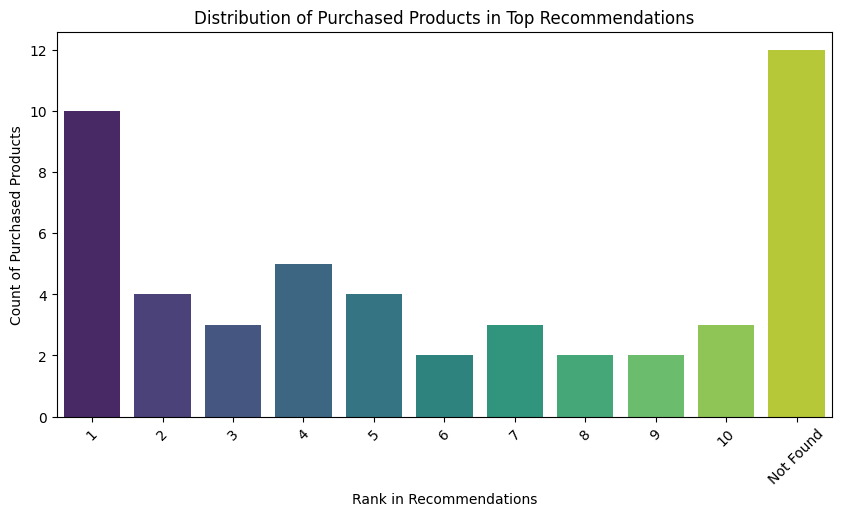

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to categorical for proper ordering in the graph
results_df['Purchase Rank'] = pd.Categorical(results_df['Purchase Rank'], ordered=True)

# Count occurrences including 'Not Found'
rank_counts = results_df['Purchase Rank'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=rank_counts.index, y=rank_counts.values, palette="viridis")

plt.xlabel("Rank in Recommendations")
plt.ylabel("Count of Purchased Products")
plt.title("Distribution of Purchased Products in Top Recommendations")
plt.xticks(rotation=45)
plt.show()

#### **Visualizations**

**(a) Bar Chart - Match vs. No Match**

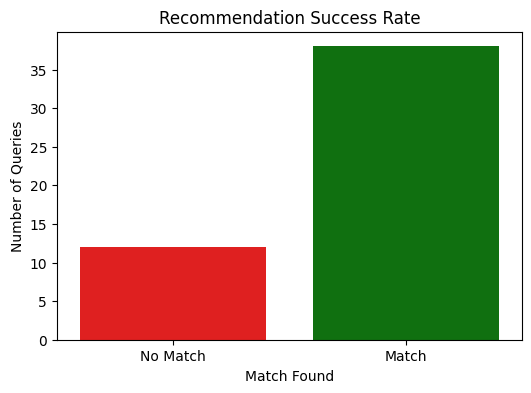

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count matches and mismatches
match_counts = results_df["Match Found"].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=match_counts.index, y=match_counts.values, palette=["red", "green"])
plt.xticks(ticks=[0, 1], labels=["No Match", "Match"])
plt.ylabel("Number of Queries")
plt.title("Recommendation Success Rate")
plt.show()


**(b) Table - Not found Queries**

In [ ]:
from IPython.display import display

# Show 12 random examples where the recommendation was incorrect
display(results_df[results_df["Match Found"] == False].sample(12))


,Query,Purchased Product,Match Found,Top Recommendations,Purchase Rank
13,Polarized luxury sunglasses for eye protection...,ditu kritu warrior aviator sunglasses,False,[silver kartz beach sky blue wayfarer rectangu...,Not Found
19,4K action cameras for adventure sports and vlo...,gopro hero12 black action camera,False,"[sd extension arm rail camera mount, microi hd...",Not Found
31,Gold-plated bracelets with intricate design fo...,voril fashion yellow gold plated plastic necklace,False,"[jewelz metal yellow gold bracelet, fashion er...",Not Found
39,Bluetooth speakers with deep bass and surround...,shortkut enterprises model no 456 mobile table...,False,[janhvi bluetooth beatz pill f wireless home a...,Not Found
36,Men's analog wristwatches with leather straps,rorlig rr 028 expedition analog watch for men ...,False,[rockstar r 056 chrono analog watch for men bo...,Not Found
16,Trendy latest dress for women,herberto girl s high low dress,False,"[idk woman women s shift dress, madaam women s...",Not Found
22,Laptop cooling pads for heat dissipation and b...,cooler master notepal x3 laptop cooling pad,False,[divinext flexible electronic laptop cooling f...,Not Found
27,Men's slim-fit formal shirts for business meet...,reckler slim fit men s jeans,False,"[pxl men s solid formal shirt, specimen men s ...",Not Found
33,Waterproof camping tents for hiking and outdoo...,vency creation waterproof multipurpose bag,False,"[president school waterproof backpack, senterl...",Not Found
40,Graphic printed hoodies for streetwear fashion,moda vastra casual 3 4 sleeve graphic print wo...,False,"[prrem s full sleeve solid women s sweatshirt,...",Not Found


# **Conclusion**

- The AI-driven recommendation system successfully enhances <font color='blue'>**product discovery and search relevance** </font>, improving user engagement on ShopEasy.
- The model’s effectiveness in <font color='blue'>**understanding semantic relationships** </font> ensures a data-driven approach to optimizing <font color='blue'>**search rankings and product recommendations** </font>.
- Highlights the system’s <font color='blue'>**ability to capture user intent** </font>, with:
  - Precise ranking of products based on <font color='blue'>**semantic similarity rather than simple keyword matching** </font>.
  - Reduction in irrelevant search results, improving <font color='blue'>**click-through rates and conversions** </font>.
- Demonstrates scalability for <font color='blue'>**large product catalogs** </font>, supporting real-time <font color='blue'>**search and recommendations with precomputed embeddings** </font> efficiently.
- Resolves key inefficiencies in <font color='blue'>**traditional keyword-based search methods** </font> while showcasing:
  - <font color='blue'>**Innovation** </font> in leveraging <font color='blue'>**NLP-based embeddings for personalized recommendations** </font>.
  - Focus on <font color='blue'>**data-driven decision-making** </font> to enhance customer satisfaction and boost sales.


## **Further Enhancement**

✅ **Fine-Tuning for Niche Categories** – Improving recommendation accuracy for specialized product categories.

✅ **Real-Time Query Suggestions** – Enhancing user experience by providing auto-suggestions based on past searches.

✅ **Multi-Language Support** – Expanding the system to support queries in multiple languages for a broader audience.

✅ **Deployment** – Creating a Gradio user interface to visualize the recommendations based on any given `user_query`.

# **Deployment (For Additional Exploration)**

In [105]:
#!pip install gradio
import gradio as gr

In [106]:
import gradio as gr
import pandas as pd

# Wrapper to format output into a clean table
def format_recommendations(user_query):
    recommendations = get_recommendations(user_query)  # Call existing function

    if isinstance(recommendations, pd.Series):
        recommendations = recommendations.to_frame(name="Product Name")  # Convert Series to DataFrame

    if not isinstance(recommendations, pd.DataFrame) or recommendations.empty:
        return pd.DataFrame(columns=["Rank", "Product Name"])  # Return empty table for blank input

    # Clean output, remove metadata & add Rank column
    recommendations = recommendations.reset_index(drop=True)
    recommendations.insert(0, "Rank", range(1, len(recommendations) + 1))

    return recommendations  # Return as table

# 🚀 Optimized Gradio UI with Flexible Layout
with gr.Blocks() as iface:
    gr.Markdown("## 🔍 AI-Powered Product Recommendation")
    gr.Markdown("Enter a query to see the top recommended products based on our AI model.")

    with gr.Row():
        with gr.Column(scale=1):  # Reduce width of input section
            user_input = gr.Textbox(label="Enter User Query", placeholder="e.g., best wireless headphones...")

            with gr.Row():  # Add Submit & Cancel buttons side by side
                submit_button = gr.Button("Submit", variant="primary")  # Orange Submit Button
                cancel_button = gr.Button("Cancel", variant="stop")  # Gray Cancel Button

        with gr.Column(scale=2):  # Expand width of output section
            output_table = gr.Dataframe(headers=["Rank", "Product Name"], interactive=False)

    submit_button.click(fn=format_recommendations, inputs=user_input, outputs=output_table)
    cancel_button.click(fn=lambda: "", inputs=[], outputs=user_input)  # Clears input field on Cancel

# 🌍 Launch Gradio
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7861


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running on public URL: https://8c96f202ecc238e695.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
